<a href="https://colab.research.google.com/github/NaveenShetter1/Machine-Leaning-Notebooks/blob/main/Multicolliniarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Variance Inflation Factor

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [5]:
advertising=pd.read_csv('/content/sample_data/advertising.csv')

In [6]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
# in heatmap if correlation coeffient is more than 0.7 it is much correlated we need to remove or tranform

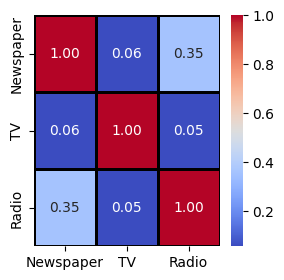

In [12]:
plt.figure(figsize=(3,3))

sns.heatmap(advertising[['Newspaper','TV','Radio']].corr(),cmap='coolwarm',annot=True,linecolor='black',fmt='0.2f',linewidths=1)

plt.show()

In [13]:
# from above nothing is more correlated among independed variables

In [14]:
# we can check this by VIF as well


In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [18]:
x_ind=advertising.drop(['Sales'],axis=1)

In [19]:
x_ind

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [20]:
type(x_ind)

pandas.core.frame.DataFrame

In [21]:
# create new data frame

In [30]:
count=0

for i in x_ind.values:
  if count==0:

    print(i)
  else:
    break
  count+=1


[230.1  37.8  69.2]


In [23]:
x_ind.columns

Index(['TV', 'Radio', 'Newspaper'], dtype='object')

In [22]:
VIF_Dataframe=pd.DataFrame()

In [24]:
VIF_Dataframe['Features']=x_ind.columns

In [25]:
VIF_Dataframe

,Features
0,TV
1,Radio
2,Newspaper


In [26]:
# caclulate VIF for each column

In [32]:
VIF_Dataframe['VIF']=[vif(x_ind.values,i) for i in range(len(x_ind.columns))]

In [31]:
[i for i in range(len(x_ind.columns))]

[0, 1, 2]

In [33]:
VIF_Dataframe.head()

,Features,VIF
0,TV,2.486772
1,Radio,3.285462
2,Newspaper,3.055245


In [1]:
# if VIF is greater than 5 we need to work on this either remove or transform(PCA)
# if greater than 10 means need to remove becuse it has high multicolliniarity